In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys

%matplotlib inline
plt.style.use('ggplot')

In [13]:
df = pd.read_csv("/Users/ytsegay/git/kaggle_rossman/c2.csv")

In [85]:
dfZeroSales = df[df.Sales == 0]

# remove zero sales
dfNoZeroSales = df.drop(df[df.Sales <= 0].index)
dfNoZeroSales = dfNoZeroSales.drop(['Customers'], axis=1)

# all data after may 2015 (including may) is considered for testing
dfTrain = dfNoZeroSales[((dfNoZeroSales.trainYear < 2014) | ((dfNoZeroSales.trainYear <= 2014) & (dfNoZeroSales.trainMonth < 7)))]
dfTest = dfNoZeroSales[((dfNoZeroSales.trainYear >= 2014) & (dfNoZeroSales.trainMonth >= 7))]

# shuffle rows around
dfTrain = dfTrain.reindex(np.random.permutation(dfTrain.index))
#dfTest = dfTest.reindex(np.random.permutation(dfTest.index))

yTrain = dfTrain.Sales
yTest = dfTest.Sales

xTrain = dfTrain.drop('Sales', axis=1)
xTest = dfTest.drop('Sales', axis=1)

In [134]:
## distribution of sales by day.
## whatever is left of dfTrain+dfTest are the rows where no sales have been made
#df.DayOfWeek.hist(bins=7, figsize=(15,5))
#dfTrain.DayOfWeek.hist(bins=7, figsize=(15,5))
#dfTest.DayOfWeek.hist(bins=7, figsize=(15,5))

df[df.Store == 539].trainMonth.value_counts()#.plot(kind="bar", figsize=(15,10))

5     93
3     93
1     93
6     90
4     90
2     84
7     62
12    31
10    31
8     31
11    30
9     30
Name: trainMonth, dtype: int64

In [16]:
# for most days the number of stores 
# which made sales are about the same, except for dat 7
#dfTrain.DayOfWeek.value_counts()

/Library/Python/2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


485781

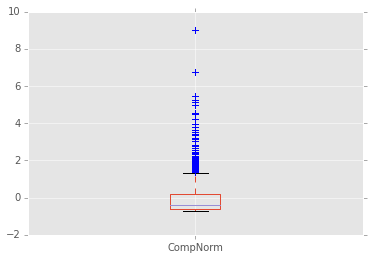

In [42]:
# zero sales means they are closed except for 54 stores
#dfZeroSales.Open.value_counts()
#xTrain.columns
xTrain.columns
xTrain["CompNorm"] = (xTrain.CompetitionDistance - xTrain.CompetitionDistance.mean())/xTrain.CompetitionDistance.std()
xTrain.boxplot(column='CompNorm')
xTrain.CompetitionDistance.describe()

len(xTrain[xTrain.CompetitionDistance < 6880])